<div style= "text-align: right">
    <p style= "text-align: right; font-weight: bold; font-size: x-large;">FIT1043 Introduction to Data Science</p>
    <p style= "text-align: right; font-weight: bold; font-size: large;">Assignment 2</p>
    <p style= "text-align: right">FOO KAI YAN<br><br><i>33085625<br><br><i>30<sup>th</sup> September 2022</i></p>
<div>
<hr style="border-color: black;">

## Importing Libraries

In [1]:
import os

os.chdir("C:\\Users\\Nicol Foo\\OneDrive\\Desktop\\School stuff\\MONASH\\FIT1043 - 2022 S2\\A2")
os.getcwd()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import regressiondemo as rd
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
%matplotlib inline

## Reading CSV Files

There will be 3 csv files used in total for this Assignment. 

In [2]:
# Read Australian_Road_Deaths.csv file
au_road_death = pd.read_csv('Australian_Road_Deaths.csv')

## Assignment - Part A

In [3]:
# A1
# .shape to get the dimension of the data's table
# (rows, columns)
au_road_death.shape

(9140, 22)

In [4]:
# A2
# Check how many unique values in the column National Remoteness Areas
nra = au_road_death["National Remoteness Areas"].nunique(dropna=False)
print("Unique values including NaN: ", nra)
# .value_count to get the count of unique values for certain columns
au_road_death["National Remoteness Areas"].value_counts(dropna=False)
# dropna=False is used so NaN values are included when counting

Unique values including NaN:  6


Major Cities of Australia    2375
NaN                          2248
Inner Regional Australia     2218
Outer Regional Australia     1652
Very Remote Australia         339
Remote Australia              308
Name: National Remoteness Areas, dtype: int64

In [5]:
# A2
# Check how many unique values in the column SA4 Name 2016
sa4 = au_road_death["SA4 Name 2016"].nunique(dropna=False)
print("Unique values including NaN: ", sa4)
# .value_count to get the count of unique values for certain columns
au_road_death["SA4 Name 2016"].value_counts(dropna=False)
# dropna=False is used so NaN values are included when counting

Unique values including NaN:  89


NaN                               2234
Western Australia - Wheat Belt     231
South Australia - South East       201
Northern Territory - Outback       173
Capital Region                     167
                                  ... 
Moreton Bay - South                 19
Brisbane - North                    18
Toowoomba                           14
Brisbane Inner City                 11
Brisbane - West                      4
Name: SA4 Name 2016, Length: 89, dtype: int64

In [6]:
# A2
# Check how many unique values in the column National LGA Name 2017
lga = au_road_death["National LGA Name 2017"].nunique(dropna=False)
print("Unique values including NaN: ", lga)
# .value_count to get the count of unique values for certain columns
au_road_death["National LGA Name 2017"].value_counts(dropna=False)
# dropna=False is used so NaN values are included when counting

Unique values including NaN:  501


NaN                   2233
Central Coast           92
Brisbane (C)            73
Lake Macquarie          62
Gold Coast (C)          61
                      ... 
Flinders (S) (Qld)       1
Derby - West Ki          1
Kent (S)                 1
Mosman Park (T)          1
Leonora (S)              1
Name: National LGA Name 2017, Length: 501, dtype: int64

In [7]:
# A2
# Check how many unique values in the column National Road Type
nrt = au_road_death["National Road Type"].nunique(dropna=False)
print("Unique values including NaN: ", nrt)
# .value_count to get the count of unique values for certain columns
au_road_death["National Road Type"].value_counts(dropna=False)
# dropna=False is used so NaN values are included when counting

Unique values including NaN:  10


NaN                          2249
National or State Highway    2024
Arterial Road                1777
Local Road                   1436
Sub-Arterial Road            1048
Collector Road                483
Access Road                   101
Undetermined                   15
Pedestrian Thoroughfare         5
Busway                          2
Name: National Road Type, dtype: int64

In [8]:
# A3
# 1.
# count for rows containing Blank (NaN), "Unspecified" and "Undetermined" values
sum_val = ((au_road_death.isin(["Unspecified","Undetermined"]).sum(axis=1) > 0) | (au_road_death.isna().sum(axis=1) > 0)).sum()
# sum of all rows with missing values
print("Rows containing missing values: ", sum_val)

Rows containing missing values:  2302


In [9]:
# A3
# 2.
# This shows the Months together with Year in YYYYMM format where no missing values are included
au_road_death.loc[~(au_road_death.isin(["Unspecified","Undetermined"]).sum(axis=1) > 0) | (au_road_death.isna().sum(axis=1) > 0)]
au_road_death["YYYYMM"].unique()

array([202109, 202108, 202107, 202106, 202105, 202104, 202103, 202102,
       202101, 202012, 202011, 202010, 202009, 202008, 202007, 202006,
       202005, 202004, 202003, 202002, 202001, 201912, 201911, 201910,
       201909, 201908, 201907, 201906, 201905, 201904, 201903, 201902,
       201901, 201812, 201811, 201810, 201809, 201808, 201807, 201806,
       201805, 201804, 201803, 201802, 201801, 201712, 201711, 201710,
       201709, 201708, 201707, 201706, 201705, 201704, 201703, 201702,
       201701, 201612, 201611, 201610, 201609, 201608, 201607, 201606,
       201605, 201604, 201603, 201602, 201601, 201512, 201511, 201510,
       201509, 201508, 201507, 201506, 201505, 201504, 201503, 201502,
       201501, 201412, 201411, 201410, 201409, 201408, 201407, 201406,
       201405, 201404, 201403, 201402, 201401], dtype=int64)

From the output above, we can see that from January 2014 to September 2021, the months in between the duration all have crashes. And in these months, there is no missing values.

In [10]:
au_road_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9140 entries, 0 to 9139
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       9140 non-null   int64 
 1   State                          9140 non-null   object
 2   YYYYMM                         9140 non-null   int64 
 3   Day of week                    9140 non-null   object
 4   Time                           9140 non-null   object
 5   Crash Type                     9140 non-null   object
 6   Bus Involvement                9118 non-null   object
 7   Heavy Rigid Truck Involvement  9118 non-null   object
 8   Articulated Truck Involvement  9118 non-null   object
 9   Road User                      9140 non-null   object
 10  Gender                         9133 non-null   object
 11  Age                            9140 non-null   int64 
 12  Speed                          9140 non-null   int64 
 13  Dri

In [11]:
no_null_val = au_road_death.columns[~au_road_death.isnull().any()]
no_null_val

Index(['Crash ID', 'State', 'YYYYMM', 'Day of week', 'Time', 'Crash Type',
       'Road User', 'Age', 'Speed', 'Driving experience', 'Christmas Period',
       'Easter Period', 'Time of day'],
      dtype='object')

In [12]:
null_val = au_road_death.columns[au_road_death.isnull().any()]
null_val

Index(['Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Gender', 'National Remoteness Areas',
       'SA4 Name 2016', 'National LGA Name 2017', 'National Road Type',
       'Age Group'],
      dtype='object')

From the 3 cells above, it is known that columns other than 'Crash ID', 'State', 'YYYYMM', 'Day of week', 'Time', 'Crash Type', 'Road User', 'Age', 'Speed', 'Driving experience', 'Christmas Period', 'Easter Period' and 'Time of day' have null values.

In [13]:
# Get Month and Year columns extracted from "YYYYMM"
au_road_death["Year"] = pd.to_datetime(au_road_death["YYYYMM"], format="%Y%m")
au_road_death["Year"] = au_road_death["Year"].dt.year
au_road_death["Month"] = pd.to_datetime(au_road_death["YYYYMM"], format="%Y%m")
au_road_death["Month"] = au_road_death["Month"].dt.month
au_road_death

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Year,Month
0,20212133,Vic,202109,Sunday,0:30:00,Single,NaN,NaN,NaN,Motorcycle rider,...,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Night,2021,9
1,20214022,SA,202109,Saturday,23:31:00,Multiple,No,No,No,Pedestrian,...,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Night,2021,9
2,20212096,Vic,202109,Saturday,23:00:00,Single,NaN,NaN,NaN,Car passenger,...,Inner Regional Australia,Hume,Wangaratta (RC),Access Road,No,No,17_to_25,Night,2021,9
3,20212145,Vic,202109,Saturday,22:25:00,Single,NaN,NaN,NaN,Car driver,...,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Night,2021,9
4,20212075,Vic,202109,Saturday,5:15:00,Single,NaN,NaN,NaN,Motorcycle rider,...,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Night,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,20142068,Vic,201401,Monday,18:20:00,Single,No,No,No,Car passenger,...,NaN,NaN,NaN,NaN,No,No,26_to_39,Night,2014,1
9136,20141285,NSW,201401,Tuesday,20:50:00,Single,No,No,No,Car driver,...,NaN,NaN,NaN,NaN,No,No,65_to_74,Night,2014,1
9137,20143125,Qld,201401,Friday,1:00:00,Single,No,No,No,Motorcycle pillion Car passenger,...,NaN,NaN,NaN,NaN,No,No,17_to_25,Night,2014,1
9138,20143065,Qld,201401,Friday,10:00:00,Multiple,No,No,Yes,Car driver,...,NaN,NaN,NaN,NaN,No,No,26_to_39,Day,2014,1


In [14]:
# A3
# 2.
# used A3 1. method but get the opposite value using ~
au_road_death.loc[(au_road_death.isin(["Unspecified","Undetermined"]).sum(axis=1) > 0) | ~(au_road_death.isna().sum(axis=1) > 0)]
# Get the unique months that does contains any missing values
au_road_death["Month"].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10], dtype=int64)

Since all months have missing values, it means that there is 0 months with no missing values.

In [15]:
# A3
# 3.
au_road_death.drop(au_road_death.loc[(au_road_death.isin(["Unspecified","Undetermined"]).sum(axis=1) > 0) | (au_road_death.isna().sum(axis=1) > 0)].index, inplace=True)
# Reset index after removing rows with missing values
au_road_death.reset_index(drop=True)

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Year,Month
0,20213034,Qld,202109,Saturday,4:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night,2021,9
1,20213026,Qld,202109,Wednesday,23:00:00,Multiple,No,No,No,Car passenger,...,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night,2021,9
2,20213092,Qld,202109,Saturday,2:00:00,Single,No,No,No,Car driver,...,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night,2021,9
3,20214053,SA,202109,Thursday,21:00:00,Single,No,No,No,Car driver,...,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night,2021,9
4,20213178,Qld,202109,Sunday,21:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,20144083,SA,201401,Friday,11:10:00,Multiple,No,Yes,No,Car passenger,...,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day,2014,1
6834,20145108,WA,201401,Wednesday,11:47:00,Single,No,No,No,Motorcycle rider,...,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day,2014,1
6835,20144022,SA,201401,Monday,9:35:00,Single,No,No,No,Pedestrian,...,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day,2014,1
6836,20145072,WA,201401,Tuesday,21:30:00,Single,No,No,No,Car driver,...,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night,2014,1


Originally, there is 9140 rows and 22 columns where 2302 rows consisted of missing values like NaN, Unspecificed and Undetermined. Then 2 extra columns, "Year" and "Month", were added. After dropping all the rows that consisted of missing values, only 6838 rows and 24 columns remains as 2303 rows were removed. 

9140 rows - 2302 rows = 6838 rows

In [16]:
# A3
# 4.
# Removed the duplicated rows and reseting the index afterwards
au_road_death.drop_duplicates(inplace=True)
au_road_death.reset_index(drop=True)

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Year,Month
0,20213034,Qld,202109,Saturday,4:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night,2021,9
1,20213026,Qld,202109,Wednesday,23:00:00,Multiple,No,No,No,Car passenger,...,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night,2021,9
2,20213092,Qld,202109,Saturday,2:00:00,Single,No,No,No,Car driver,...,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night,2021,9
3,20214053,SA,202109,Thursday,21:00:00,Single,No,No,No,Car driver,...,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night,2021,9
4,20213178,Qld,202109,Sunday,21:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,20144083,SA,201401,Friday,11:10:00,Multiple,No,Yes,No,Car passenger,...,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day,2014,1
6818,20145108,WA,201401,Wednesday,11:47:00,Single,No,No,No,Motorcycle rider,...,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day,2014,1
6819,20144022,SA,201401,Monday,9:35:00,Single,No,No,No,Pedestrian,...,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day,2014,1
6820,20145072,WA,201401,Tuesday,21:30:00,Single,No,No,No,Car driver,...,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night,2014,1


After removeing the duplicated rows, there is only 6822 rows left that does not have missing values and duplicated rows

In [17]:
# A4
crashes_month = au_road_death.groupby(["Month"])["Crash Type"].count()
crashes_month

Month
1     593
2     514
3     654
4     575
5     554
6     556
7     596
8     637
9     531
10    530
11    517
12    565
Name: Crash Type, dtype: int64

In [18]:
# A4
max_crash = au_road_death.groupby(["Month"])["Crash Type"].count().sort_values(ascending=False)
max_crash

Month
3     654
8     637
7     596
1     593
4     575
12    565
6     556
5     554
9     531
10    530
11    517
2     514
Name: Crash Type, dtype: int64

March(3) and August(8) are the two months with the highest number of crashes recorded which are 659 and 637 respectively.

In [19]:
# A5
# 1.
# Part (a) was already done above when doing A3 2. with:
# au_road_death["Year"] = pd.to_datetime(au_road_death["YYYYMM"], format="%Y%m")
# au_road_death["Year"] = au_road_death["Year"].dt.year
# au_road_death["Month"] = pd.to_datetime(au_road_death["YYYYMM"], format="%Y%m")
# au_road_death["Month"] = au_road_death["Month"].dt.month
au_road_death

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Year,Month
5,20213034,Qld,202109,Saturday,4:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night,2021,9
8,20213026,Qld,202109,Wednesday,23:00:00,Multiple,No,No,No,Car passenger,...,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night,2021,9
9,20213092,Qld,202109,Saturday,2:00:00,Single,No,No,No,Car driver,...,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night,2021,9
10,20214053,SA,202109,Thursday,21:00:00,Single,No,No,No,Car driver,...,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night,2021,9
11,20213178,Qld,202109,Sunday,21:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106,20144083,SA,201401,Friday,11:10:00,Multiple,No,Yes,No,Car passenger,...,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day,2014,1
9112,20145108,WA,201401,Wednesday,11:47:00,Single,No,No,No,Motorcycle rider,...,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day,2014,1
9121,20144022,SA,201401,Monday,9:35:00,Single,No,No,No,Pedestrian,...,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day,2014,1
9129,20145072,WA,201401,Tuesday,21:30:00,Single,No,No,No,Car driver,...,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night,2014,1


In [20]:
# A5
b = au_road_death.loc[(au_road_death["Road User"]=="Car driver")].agg(['unique'])
b

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Year,Month
unique,"[20213092, 20214053, 20211068, 20213026, 20213...","[Qld, SA, NSW, Tas, Vic, NT, ACT, WA]","[202109, 202108, 202107, 202106, 202105, 20210...","[Saturday, Thursday, Tuesday, Wednesday, Sunda...","[2:00:00, 21:00:00, 21:50:00, 23:00:00, 13:00:...","[Single, Multiple]","[No, Yes]","[No, Yes]","[No, Yes]",[Car driver],...,"[Major Cities of Australia, Inner Regional Aus...","[Logan - Beaudesert, Adelaide - Central and Hi...","[Logan (C), Adelaide Hills (DC), Central Coast...","[Local Road, Sub-Arterial Road, Arterial Road,...","[No, Yes]","[No, Yes]","[40_to_64, 17_to_25, 26_to_39, 75_or_older, 65...","[Night, Day]","[2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]","[9, 8, 7, 6, 5, 4, 3, 2, 1, 12, 11, 10]"


Number of crashes by Month and Year for Car driver:

In [21]:
# A5
# 1.
# Part (b)
au_road_death.loc[(au_road_death["Road User"]=="Car driver")].groupby(["Year","Month"])["Crash Type"].count()

Year  Month
2014  1         7
      2        10
      3        12
      4         9
      5         6
               ..
2021  5        33
      6        41
      7        43
      8        39
      9        21
Name: Crash Type, Length: 93, dtype: int64

Text(0, 0.5, 'Average number of crashes')

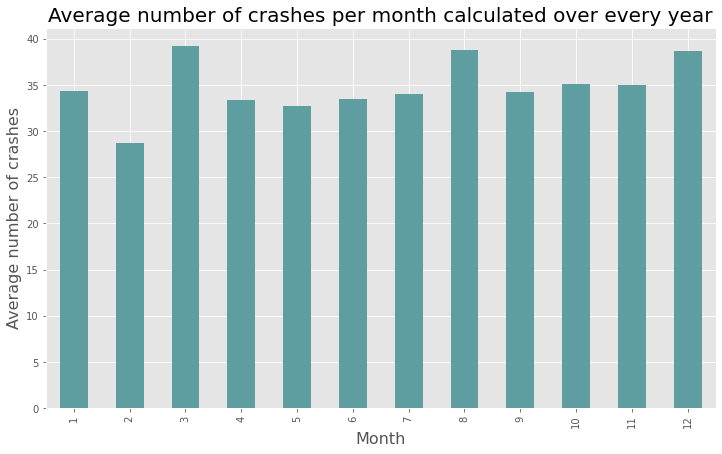

In [22]:
# A5
# 1.
# Part (c)
# Step 1: Average number of crashes per month
step_1 = au_road_death.loc[(au_road_death["Road User"]=="Car driver")].groupby(["Month"])["Crash Type"].count()
# Step 2: Average number of crashes per month over each year
step_2 = au_road_death.loc[(au_road_death["Road User"]=="Car driver")].groupby(["Year", "Month"])["Crash Type"].count()
a5_1c = step_2.to_frame()
a5_1c_final = a5_1c.groupby(["Month"])["Crash Type"].mean()

plt.style.use('ggplot')
a5_1c_final.plot(kind='bar',figsize=(12,7), color='cadetblue',legend=None)
plt.title("Average number of crashes per month calculated over every year", fontsize=20)
plt.xlabel("Month",fontsize=16)
plt.ylabel("Average number of crashes",fontsize=16)

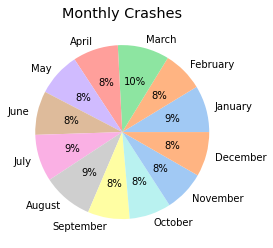

In [23]:
# A5
# 2.
avg_mth_crash = au_road_death.groupby(["Month"])["Crash Type"].count()
labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
colors = sns.color_palette('pastel')[0:12]
plt.title("Monthly Crashes")
plt.pie(avg_mth_crash, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

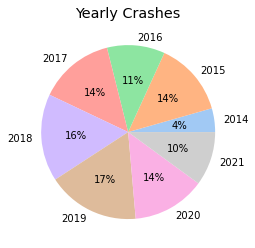

In [24]:
avg_yr_crash = au_road_death.groupby(["Year"])["Crash Type"].count()
labels = ["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
colors = sns.color_palette('pastel')[0:8]
plt.title("Yearly Crashes")
plt.pie(avg_yr_crash, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

A5 3.

From question A5 2., I was only tasked to do a chart for monthly crashes but I also did an additional chart for yearly crashes to assist in my findings and explanation from the chart.

From the pie chart titled Monthly Crashes, it clearly shows that March has accounted for 10% of the total count of crashes which is the month with the highest crashes for 12 months over 8 years. January, July and August each have accounted for 9% of the total count of crashes which is slightly lower than March which have the highest number of crashes recorded. The rest of the months each have accounted for around 8% of total crashes. This shows that throughout the months, people travelled around by vehicles quite evenly but there's a slight peak of crashes in March maybe due to the civilians in Australia having a slightly more hectic work schedule in March. Overall, the number of crashes happening is distributed evenly throughout the months.

From the pie chart titled Yearly Crashes, it clearly shows that 2014 is the year with the least number of crashes whereas 2019 is the year with the greatest number of crashes for 12 months over 8 years. In 2014, vehicles were seen as much as now as vehicles in 2014 were expensive and not many people could afford it and hence more people turn to public transport instead of private vehicles to travel places. The numbers of crashes fluctuate but still increased from 2014 to 2019 where the number of crashes peaked as seen from the pie chart titled Yearly Crashes but the number of crashes decreased by 3% from 2019 to 2020 as most people if not everyone was forced to stay at home due to lock down to prevent the spread of Covid. The pandemic lasted for around 2 years from 2020 to 2021 but in 2020, the civilians do not yet know the severity of Covid, hence 2020 have more crashes than 2021 as people were still driving as they wish. In 2021, people in Australia finally learnt and understood the severity of Covid and hence less people went out of home unless necessary and hence the number of crashes decreased further by 4% from 2020 to 2021.

In [25]:
# A6
# 1.
a6_1 = {'Speed': au_road_death["Speed"],
        'National Road Type': au_road_death["National Road Type"],
        'Road User': au_road_death["Road User"],
        }

df_a6_1 = pd.DataFrame(a6_1)
filter_data = df_a6_1.loc[df_a6_1['Road User']=='Car driver'].reset_index()
filter_data["National Road Type"].unique()

array(['Local Road', 'Sub-Arterial Road', 'Arterial Road',
       'National or State Highway', 'Collector Road', 'Access Road',
       'Pedestrian Thoroughfare'], dtype=object)

This shows that there is 7 type of National Road used for the Car driver

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Local Road'),
  Text(1, 0, 'Sub-Arterial Road'),
  Text(2, 0, 'Arterial Road'),
  Text(3, 0, 'National or State Highway'),
  Text(4, 0, 'Collector Road'),
  Text(5, 0, 'Access Road'),
  Text(6, 0, 'Pedestrian Thoroughfare')])

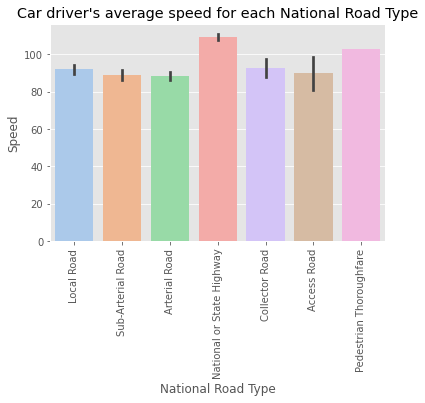

In [26]:
# A6
# 1.
filter_data = df_a6_1.loc[df_a6_1['Road User']=='Car driver'].reset_index()
sns.barplot(data = filter_data, x = filter_data["National Road Type"], y = filter_data["Speed"], palette = "pastel").set(title="Car driver's average speed for each National Road Type")
plt.xticks(rotation=90)

In [27]:
# A6
# 2. 
au_road_death.shape
# Before chnaging any counter-intuitive values, there is 6822 rows and 26 columns

(6822, 24)

In [28]:
# A6
# 2. 
# Find which row contains age value less than 0
au_road_death.loc[(au_road_death["Age"] < 0)]

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Year,Month
40,20213187,Qld,202109,Wednesday,7:00:00,Multiple,No,Yes,Yes,Car driver,...,Major Cities of Australia,Brisbane - North,Brisbane (C),Sub-Arterial Road,No,No,40_to_64,Day,2021,9
90,20216009,Tas,202108,Sunday,1:30:00,Multiple,No,No,No,Car driver,...,Outer Regional Australia,South East,Derwent Valley (M),Arterial Road,No,No,40_to_64,Night,2021,8
5204,20171014,NSW,201704,Wednesday,15:38:00,Single,No,Yes,No,Pedestrian,...,Major Cities of Australia,Central Coast,Central Coast,Collector Road,No,No,0_to_16,Day,2017,4
7702,20151052,NSW,201504,Wednesday,15:20:00,Single,No,No,Yes,Pedestrian,...,Major Cities of Australia,Sydney - Ryde,Parramatta,Arterial Road,No,No,65_to_74,Day,2015,4


In [29]:
# A6
# 2. 
# Replace each with 0
au_road_death.loc[au_road_death["Age"] < 0] = 0
au_road_death.reset_index(drop=True)

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Year,Month
0,20213034,Qld,202109,Saturday,4:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night,2021,9
1,20213026,Qld,202109,Wednesday,23:00:00,Multiple,No,No,No,Car passenger,...,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night,2021,9
2,20213092,Qld,202109,Saturday,2:00:00,Single,No,No,No,Car driver,...,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night,2021,9
3,20214053,SA,202109,Thursday,21:00:00,Single,No,No,No,Car driver,...,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night,2021,9
4,20213178,Qld,202109,Sunday,21:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,20144083,SA,201401,Friday,11:10:00,Multiple,No,Yes,No,Car passenger,...,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day,2014,1
6818,20145108,WA,201401,Wednesday,11:47:00,Single,No,No,No,Motorcycle rider,...,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day,2014,1
6819,20144022,SA,201401,Monday,9:35:00,Single,No,No,No,Pedestrian,...,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day,2014,1
6820,20145072,WA,201401,Tuesday,21:30:00,Single,No,No,No,Car driver,...,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night,2014,1


In [30]:
# A6
# 2. 
au_road_death.shape
# After chnaging any counter-intuitive values, there is still 6822 rows and 26 columns

(6822, 24)

In [31]:
# A6
# 2. 
# Prove that there is no rows under "Age" that has age below 0
au_road_death.loc[(au_road_death["Age"] < 0)]

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Year,Month


In [32]:
# A7
# 1. 
# Find the types of Road user present in the dataset
au_road_death["Road User"].unique()

array(['Motorcycle rider', 'Car passenger', 'Car driver', 0,
       'Pedal cyclist', 'Pedestrian', 'Other vehicle driver',
       'Motorcycle pillion Car passenger'], dtype=object)

From the list above, only "Motorcycle rider", "Car driver", "Pedal cyclist" and "Other vehicle driver" are vehicle drivers.

"Car passenger", "Motorcycle pillion Car passenger" and "Pedestrian" are not drivers or vehicle drivers.

Pairwise correlation of columns, Age, Speed and Driving Experiences.
Pairs available will be :
1. Age, Speed
2. Speed, Driving Experiences
3. Age, Driving Experiences

In [33]:
# A7
# 1. 
vehicle_drivers_data = {'Age': au_road_death["Age"],
                        'Speed': au_road_death["Speed"],
                        'Road User': au_road_death["Road User"],
                        'Driving Experiences': au_road_death["Driving experience"]}

vehicle_drivers = pd.DataFrame(vehicle_drivers_data)
# Remove rows that have "Car passenger", "Motorcycle pillion Car passenger" and "Pedestrian" as Road User
vehicle_drivers = vehicle_drivers.drop(vehicle_drivers.loc[vehicle_drivers['Road User']=="Car passenger"].index)
vehicle_drivers = vehicle_drivers.drop(vehicle_drivers.loc[vehicle_drivers['Road User']=="Pedestrian"].index)
vehicle_drivers = vehicle_drivers.drop(vehicle_drivers.loc[vehicle_drivers['Road User']=="Motorcycle pillion Car passenger"].index)
print("Dimension of vehicle_drivers dataframe: ", vehicle_drivers.shape)
# Pairwise correlation 
all_columns_correlation = vehicle_drivers.corr()
all_columns_correlation

Dimension of vehicle_drivers dataframe:  (4628, 4)


,Age,Speed,Driving Experiences
Age,1.000000,-0.000498,0.938315
Speed,-0.000498,1.000000,-0.003877
Driving Experiences,0.938315,-0.003877,1.000000


A7 1. 

The correlation between 3. which is "Age" and "Driving Experiences" is higher than 0.7 which is already considered strong.

The correlation between 2. which is "Age" and "Speed" is -0.000498 which is considered very weak. 

The correlation between 1. which is "Speed" and "Driving Experiences" is -0.003877 which is considered very weak. 

Overall, the correlation between "Age" and "Speed"; "Speed" and "Driving Experiences" is considered very weak whereas the correlation between "Age" and "Driving Experiences" is very strong and have the highest linear association as it is within the range of 0.9-1.0. Having a high linear association means that "Age" and "Driving Experiences" have high ratio of proportion whereby their variables have constant or even same values.

Text(0, 0.5, 'Number of crashes')

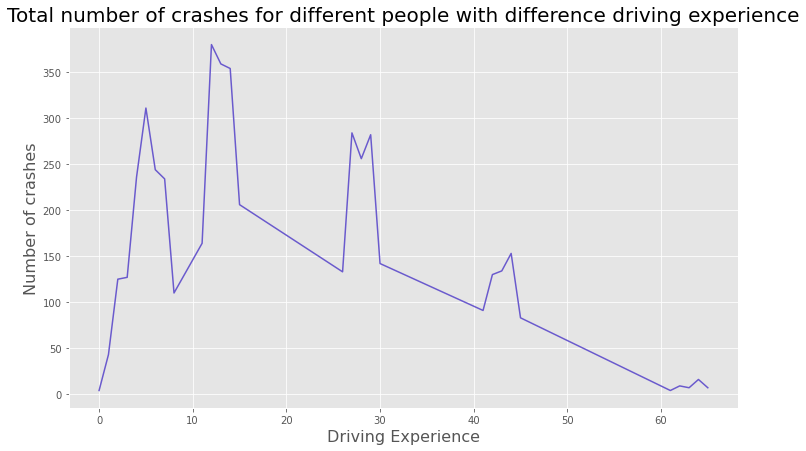

In [34]:
# A7
# 2. 
# Plot "Driving Experiences" (x-axis) and number of crashes (y-axis)
vehicle_drivers_data = {'Age': au_road_death["Age"],
                        'Speed': au_road_death["Speed"],
                        'Road User': au_road_death["Road User"],
                        'Driving Experiences': au_road_death["Driving experience"],
                       'Crash ID': au_road_death["Crash ID"]}

vehicle_drivers = pd.DataFrame(vehicle_drivers_data)
# Remove rows that have "Car passenger", "Motorcycle pillion Car passenger" and "Pedestrian" as Road User
vehicle_drivers = vehicle_drivers.drop(vehicle_drivers.loc[vehicle_drivers['Road User']=="Car passenger"].index)
vehicle_drivers = vehicle_drivers.drop(vehicle_drivers.loc[vehicle_drivers['Road User']=="Pedestrian"].index)
vehicle_drivers = vehicle_drivers.drop(vehicle_drivers.loc[vehicle_drivers['Road User']=="Motorcycle pillion Car passenger"].index)

a7_2 = vehicle_drivers.groupby(["Driving Experiences"])["Crash ID"].count()
plt.style.use('ggplot')
a7_2.plot(kind='line',figsize=(12,7), color='slateblue',legend=None)
plt.title("Total number of crashes for different people with difference driving experience", fontsize=20)
plt.xlabel("Driving Experience",fontsize=16)
plt.ylabel("Number of crashes",fontsize=16)

According to the line graph computed as shown above, the general pattern is obviously shown that the average number of crashes happening decreased as the vehicle driver have accumulated more driving experience. Although there are a few peaks from certain age of driving experience but generally, the graph still shows a general decline of number of crashes as driving experience increased. 

The peaks in the age range of 0 to 10 is may be due to parents crashing their vehicle while their children are within the vehicle or just because of vehicle malfunctioning.

The peaks in the age range of 10 to 20 may be due to teenagers being rebellious and wanted to try driving their parents which resulted them to have an accident by crashing onto some infrastructure or other vehicles. Teenagers within this age range still have not reach the age to learn driving. The peak could also happen due to parents crashing their vehicle while the teenagers are within the vehicle or just purely the result of vehicle malfunctioning.

The peaks in the age range of 20 and above may be due to bad weather conditions like slippery road surface or drunk driving or just vehicle malfunctioning. The vehicle drivers above age 20 would have already learnt driving taught by either their parents or driving instructure so they would have already learnt the proper method to control and manuveur their vehicles. Of course, mistakes made by these drivers could happen which result in a crash.

In [35]:
# A8
# 1.
# The number of crashes over different years
accidents_year_count = au_road_death.groupby(["Year"])["Crash Type"].count().reset_index()
accidents_year_count = accidents_year_count.drop(accidents_year_count.loc[accidents_year_count["Year"]==0].index)
accidents_year_count
# Identify x and y value
x = accidents_year_count["Year"]
y = accidents_year_count["Crash Type"]
# Get values used for linear regression
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: %f intercept: %f" % (slope, intercept))
print("r-value: %f" % r_value)
print("p-value: %f" % p_value)

slope: 48.642857 intercept: -97284.714286
r-value: 0.429552
p-value: 0.288179


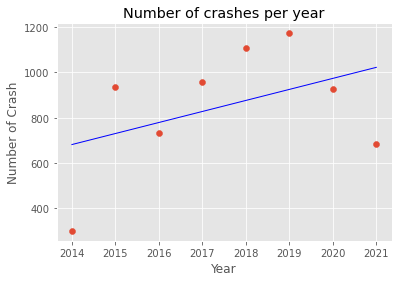

In [36]:
# A8
# 1. (The number of crashes over different years)
accidents_year_count = au_road_death.groupby(["Year"])["Crash Type"].count().reset_index()
accidents_year_count = accidents_year_count.drop(accidents_year_count.loc[accidents_year_count["Year"]==0].index)
accidents_year_count

x = accidents_year_count["Year"]
y = accidents_year_count["Crash Type"]

trueX = x[:]
trueY = y[:]

trueYNew=[x-1.5 for x in trueY]

plt.scatter(x,y)
line = [slope*xi + intercept for xi in x]
plt.plot(x,line,'b-', linewidth=1)
plt.title("Number of crashes per year")
plt.xlabel("Year")
plt.ylabel("Number of Crash")
plt.show()

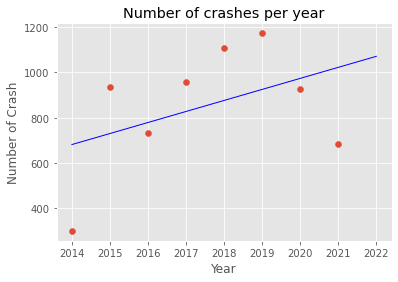

In [37]:
# A8
# 2.
years_extended = np.arange(2014, 2023, 1)

x = accidents_year_count["Year"]
y = accidents_year_count["Crash Type"]

trueX = x[:]
trueY = y[:]

trueYNew=[x-1.5 for x in years_extended]

plt.scatter(x,y)
line = [slope*xi + intercept for xi in years_extended]
plt.plot(years_extended,line,'b-', linewidth=1)
plt.xticks(range(2014, 2023, 1))
plt.title("Number of crashes per year")
plt.xlabel("Year")
plt.ylabel("Number of Crash")
plt.show()

For A8 part 3, polynomial orders is used to find best fit. First, a set of polynomial orders will be used to fit a set of polynomial orders

In [38]:
points = 50
orders = rd.makeOrders(points)
print('Fitting polynomials of orders = ', orders)

# Standard deviation
rd.setSigma(0.2)

Fitting polynomials of orders =  [2, 5, 10, 20, 41]


First graph is the scatter plot with the given data from the dataset
Second graph is the scatter plot with a line which shows the relationship between year and crash number


Text(0, 0.5, 'Number of Crash')

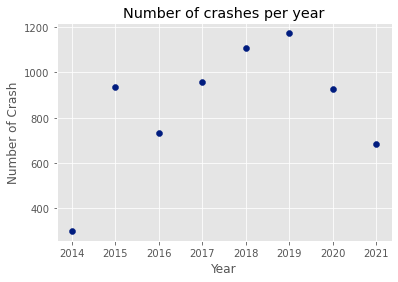

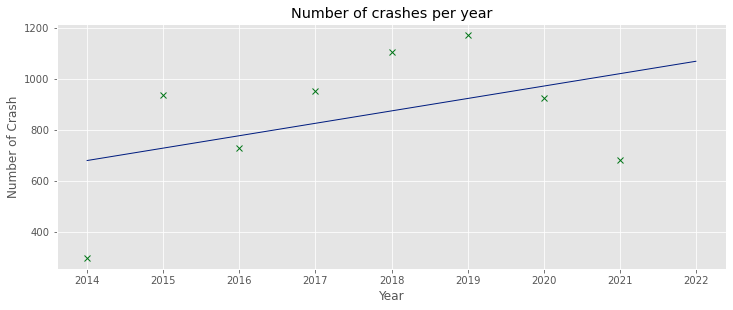

In [39]:
# A8
# 3.
plt.style.use('seaborn-dark-palette')
x = accidents_year_count["Year"]
y = accidents_year_count["Crash Type"]
years_extended = np.arange(2014, 2023, 1)

print("First graph is the scatter plot with the given data from the dataset")
plt.scatter(x,y)
plt.title("Number of crashes per year")
plt.ylabel('Number of Crash')
plt.xlabel('Year')
plt.figure(figsize=[12,4.5])

xts = accidents_year_count["Year"]
yts = accidents_year_count["Crash Type"]

print("Second graph is the scatter plot with a line which shows the relationship between year and crash number")
line = [slope*xi + intercept for xi in years_extended]

plt.plot(years_extended, line, label = 'truth', linewidth=1)
plt.plot(x, y, 'x')
plt.xticks(range(2014, 2023, 1))
plt.title("Number of crashes per year")
plt.xlabel("Year")
plt.ylabel("Number of Crash")

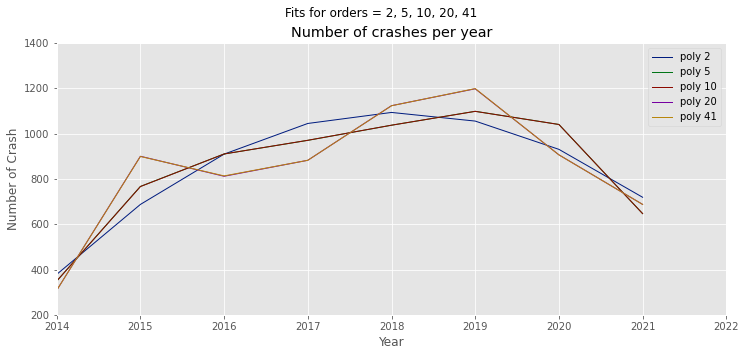

In [40]:
# A8
# 3.
plt.figure(figsize=[12,5])
plt.ylim(200, 1400)
plt.xlim(2014, 2022)
orders = rd.makeOrders(points)

for order in orders:
    ys = rd.linReg(x, y, xts, order)
    plt.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.suptitle('Fits for orders = '+ ', '.join(map(str, orders)) )
    plt.title("Number of crashes per year")
    plt.xlabel("Year")
    plt.ylabel("Number of Crash")

The model used is called polynomial regression. Polynomial regression allows the machine to consider the non-linear relationship between year and number of crashes and give a concluded estimation. Machines could also use polynomial regression to predict how the future data will go to so for instance, the number of crashes recorded in the dataset is only up until year 2021 but machines could use what it learnt from this dataset and predict the number of crashes in 2022.

From the graph shown above, poly 2 is the best fit to the data points on Number of crash against each year so poly 2 will be used to predict the best value for number of crash for 2022.

Text(0, 0.5, 'Number of Crash')

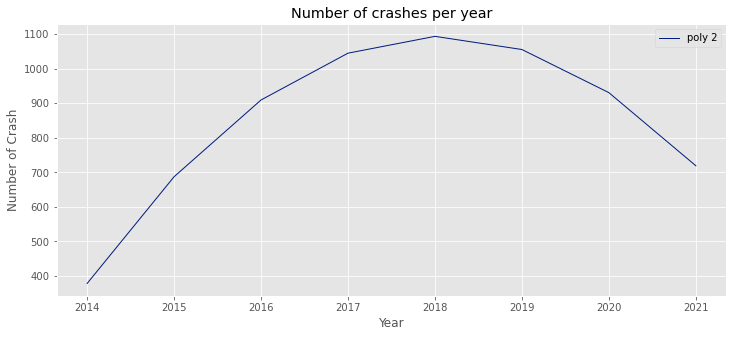

In [41]:
plt.figure(figsize=[12,5])
x = accidents_year_count["Year"]
y = accidents_year_count["Crash Type"]
order = 2
ys = rd.linReg(x, y, xts, order)
plt.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1)
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Number of crashes per year")
plt.xlabel("Year")
plt.ylabel("Number of Crash")

In [42]:
# A8
# 4.
lin_reg = LinearRegression()
lin_reg.fit(x.values.reshape(-1, 1), y)
lin_reg.predict([[2022]])

array([1071.14285714])

Using .predict after fitting x as Year and y as Number of crashes to predict the Number of Crashes during year 2022.

### **Prediction**

Through machine learning, it is predicted that there will be 1071 crashes alone in 2022.

In [43]:
au_road_death.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6822 entries, 5 to 9131
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       6822 non-null   int64 
 1   State                          6822 non-null   object
 2   YYYYMM                         6822 non-null   int64 
 3   Day of week                    6822 non-null   object
 4   Time                           6822 non-null   object
 5   Crash Type                     6822 non-null   object
 6   Bus Involvement                6822 non-null   object
 7   Heavy Rigid Truck Involvement  6822 non-null   object
 8   Articulated Truck Involvement  6822 non-null   object
 9   Road User                      6822 non-null   object
 10  Gender                         6822 non-null   object
 11  Age                            6822 non-null   int64 
 12  Speed                          6822 non-null   int64 
 13  Dri

Only "Crash ID", "YYYYMM", "Age", "Speed", "Driving experience", "Year" and "Month" is of integer values but values under "Crash ID", "YYYYMM", "Year" and "Month" are specific values which means if there is 0 under these columns, then the whole rows should be removed.

But in this assignment, only rows with value 0 under "Age" column must be changed to be replaced with another value. The method I chose is to replace 0 with the mean value of Age.

In [44]:
# A9
# Go through Age columns to replace 0 with the Age columns' mean value
print("Mean age: ", au_road_death['Age'].mean(skipna=True))
au_road_death['Age'] = au_road_death['Age'].replace(0, au_road_death['Age'].mean())
au_road_death['Age']

Mean age:  44.641893872764584


5       19.0
8        2.0
9       47.0
10      24.0
11      52.0
        ... 
9106    40.0
9112    46.0
9121    82.0
9129    84.0
9131    82.0
Name: Age, Length: 6822, dtype: float64

In [45]:
# A9 
# This is to show that there is no more rows under Age column that have 0 as Age
au_road_death.loc[(au_road_death['Age'].isin([0]))]

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Year,Month


## Assignment - Part B

### Reading CSV Files

In [46]:
# Read song_data.csv file
song = pd.read_csv('song_data.csv')

Get basic information of the file:

In [47]:
song.shape

(18835, 15)

song_data.csv file have 18835 rows and 15 columns 

In [48]:
song.info()
song.columns.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

song_data.csv file have no missing values which means there is no missing information. 

'song_name', 'song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature' and 'audio_valence' are the names of the 15 columns of the song_data.csv file.

Aim to make a model that predict song popularity for 5 popularity levels in the dataset based on features.

In [49]:
# B1
# 1.
# 75% training set; 25% testing set
x = song.iloc[:, [3, 4, 6, 12]].values # "acousticness", "danceability", "instrumentalness", "tempo"
y = song["song_popularity"]
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size = 0.25, random_state = 0
)

In [50]:
# B1
# 2.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
# B1
# 2.
# Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(
criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [52]:
# B1
# 3.
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tab_cm = pd.DataFrame(cm, range(5), range(5))
tab_cm

Accuracy: 0.49543427479294966


,0,1,2,3,4
0,81,83,178,115,14
1,82,214,231,185,20
2,145,254,776,377,39
3,114,142,300,911,51
4,1,16,14,15,351


### The index number always starts with 0 so here, all the index will add by 1 
Hence, 
- This is the confusion matrix index 0 1 2 3 4  will become 1 2 3 4 5 instead
    - 1 2 3 4 5 is the popularity level of the song
- The horizontal (x-axis) is labelled as **Predicted label**
- The vertical (y-axis) is labelled as **True label**

##### 1
- True Positives 
for 1 is 81
- False Positives 
for 1 is 390 (83 + 178 + 115 + 14)
- True negatives 
for 1 is 4156 (214 + 231 + 185 + 20 + 145 + 254 + 776 + 377 + 39 + 114 + 142 + 300 + 911 + 51 + 1 + 16 + 14 + 15 + 351)
- False Negatives 
for 1 is 342 (82 + 145 + 114 + 1)

##### 2
- True Positives
for 2 is 214
- False Positives
for 2 is 518 (82 + 231 + 185 + 20)
- True negatives
for 2 is 3482 (81 + 178 + 115 + 14 + 114 + 1 + 145 + 14 + 15 + 351 + 300 + 911 + 51 + 776 + 377 + 39)
- False Negatives 
for 2 is 495 (83 + 254 + 142 + 16)

##### 3
- True Positives
for 3 is 776
- False Positives
for 3 is 815 (145 + 254 + 377 + 39)
- True negatives
for 3 is 2395 (81 + 83 + 82 + 214 + 115 + 14 + 185 + 20 + 1 + 16 + 114 + 142 + 911 + 51 + 15 + 351)
- False Negatives 
for 3 is 723 (178 + 231 + 300 + 14)

##### 4
- True Positives
for 4 is 911
- False Positives
for 4 is 607 (114 + 142 + 300 + 51)
- True negatives
for 4 is 2499 (14 + 20 + 39 + 351 + 1 + 16 + 14 + 81 + 83 + 178 + 82 + 214 + 231 + 145 + 254 + 776)
- False Negatives 
for 4 is 692 (115 + 185 + 377 + 15)

##### 5
- True Positives
for 5 is 351
- False Positives
for 5 is 46 (1 + 16 + 14 + 15)
- True negatives
for 5 is 4188 (214 + 231 + 185 + 254 + 776 + 377 + 142 + 300 + 911 + 114 + 145 + 82 + 81 + 83 + 178 + 115)
- False Negatives 
for 5 is 124 (14 + 20 + 39 + 51)

B1 4.

According to the Confusion Matrix, there is 4 types of detections: **True Positives (TP)**, **True Negatives (TN)**, **False Positives (FP)** and **False Negatives (FN)**.

The terms can be understood by:
- **True Positives (TP)** means that it was correctly predicted that the song is of the calculated popularity level
- **True Negatives (TN)** means that it was correctly predicted that the song is not of the calculated popularity level
- **False Positives (FP)** means that it was incorrectly predicted that the song is of the calculated popularity level
- **False Negatives (FN)** means that it was incorrectly predicted that the song not is of the calculated popularity level

**False Positives (FP)** is known as a Type 1 Error whereas **False Negative (FN)** is known as a Type 2 Error. 
- Type 1 Error happens like for instance, the song A was predicted to have popularity level 3 but song A actually have popularity level 5
- Type 2 Error happens when like for example, the song B was predicted to have popularity level 4 when song B actually have popularity level 2

### Classification Metrics used to analyse the confusion matrix is Accuracy, Sensitivity, Specificity, Precision and Negative Predictive Value
- Accuracy: The correctness of prediction
- Sensitivity: aka True Positive Rate, The proportion of correct prediction obtained when the actual value is positive 
- Specificity: The proportion of correct prediction obtained when the actual value is negative 
- Precision: The proportion of incorrect prediction obtained when the actual value is positive 
- Negative Predictive Value: The proportion of incorrect prediction obtained when the actual value is negative 

##### 1
- *Sensitivity*
for 1 is 0.19148936170212765957446808510638 which is equivalent to **19.1%** in 3 significant figures
- *Specificity*
for 1 is 0.91421029476462824461064672239331 which is equivalent to **91.4%** in 3 significant figures
- *Precision*
for 1 is 0.17197452229299363057324840764331 which is equivalent to **17.2%** in 3 significant figures
- *Negative Predictive Value*
for 1 is 0.92396620720320142285460204535349 which is equivalent to **92.4%** in 3 significant figures
- *Accuracy*
for 1 is 0.85268665727510565506138055946871 which is equivalent to **85.3%** in 3 significant figures

##### 2
- *Sensitivity*
for 2 is 0.30183356840620592383638928067701 which is equivalent to **30.2%** in 3 significant figures
- *Specificity*
for 2 is 0.8705 which is equivalent to **87.1%** in 3 significant figures
- *Precision*
for 2 is 0.29234972677595628415300546448087 which is equivalent to **29.2%** in 3 significant figures
- *Negative Predictive Value*
for 2 is 0.87553432235353281367865225044003 which is equivalent to **87.6%** in 3 significant figures
- *Accuracy*
for 2 is 0.784880016988744956466341049055 which is equivalent to **78.5%** in 3 significant figures

##### 3
- *Sensitivity*
for 3 is 0.5176784523015343562374916611074 which is equivalent to **51.8%** in 3 significant figures
- *Specificity*
for 3 is 0.74610591900311526479750778816199 which is equivalent to **74.6%** in 3 significant figures
- *Precision*
for 3 is 0.48774355751099937146448774355751 which is equivalent to **48.8%** in 3 significant figures
- *Negative Predictive Value*
for 3 is 0.76812059012187299550994227068634 which is equivalent to **76.8%** in 3 significant figures
- *Accuracy*
for 3 is 0.67339137821193459333191760458696 which is equivalent to **67.3%** in 3 significant figures

##### 4
- *Sensitivity*
for 4 is 0.5683094198378041172800998128509 which is equivalent to **56.8%** in 3 significant figures
- *Specificity*
for 4 is 0.80457179652285898261429491307147 which is equivalent to **80.5%** in 3 significant figures
- *Precision*
for 4 is 0.60013175230566534914361001317523 which is equivalent to **60.0%** in 3 significant figures
- *Negative Predictive Value*
for 4 is 0.78314008147916013788780946411783 which is equivalent to **78.3%** in 3 significant figures
- *Accuracy*
for 4 is 0.72414525376937778721596942025908 which is equivalent to **72.4%** in 3 significant figures

##### 5
- *Sensitivity*
for 5 is 0.73894736842105263157894736842105 which is equivalent to **73.9%** in 3 significant figures
- *Specificity*
for 5 is 0.98913556920170051960321209258385 which is equivalent to **98.9%** in 3 significant figures
- *Precision*
for 5 is 0.88413098236775818639798488664987 which is equivalent to **88.4%** in 3 significant figures
- *Negative Predictive Value*
for 5 is 0.97124304267161410018552875695733 which is equivalent to **97.1%** in 3 significant figures
- *Accuracy*
for 5 is 0.96389891696750902527075812274368 which is equivalent to **96.4%** in 3 significant figures

#### Accuracy 
From using the scikit-learn metrics module for accuracy calculation, I have gotten an accuracy of 0.49543427479294966 which is essentially 49.5%. This means that this model has 49.5% chance to classify and predict the correct popularity level for the songs given and this accuracy can be improved by tuning the parameters in the Decision Tree Algorithm.

### Reading CSV Files

In [53]:
# B2
# Read imdb_video_game_rating.csv file
game = pd.read_csv('imdb_video_game_rating.csv')

The direct link to the public dataset obtained from the internet:
https://www.kaggle.com/datasets/nyagami/video-game-ratings-from-imdb?resource=download
Monash student google drive link:
https://drive.google.com/file/d/1XRRGRWUqoHu_8C0ENlVE21l_ekH6rPSx/view?usp=sharing

The aim of B2 of the assignment is to apply k-means clustering on the data into k clusters in Python, where k >= 2

The dataset chosen is imdb_video_game_rating.csv

The data will be visualised as well as the results of the k-means clustering where each cluster is of different colours.

Get basic information of the file:

In [54]:
game.shape

(12635, 8)

There is 12635 rows and 8 columns

In [55]:
game.info()
game.columns.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12635 entries, 0 to 12634
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12635 non-null  int64  
 1   title       12635 non-null  object 
 2   year        12635 non-null  object 
 3   genre       12635 non-null  object 
 4   rating      12635 non-null  float64
 5   votes       12635 non-null  object 
 6   directors   12635 non-null  object 
 7   plot        12635 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 789.8+ KB


Index(['Unnamed: 0', 'title', 'year', 'genre', 'rating', 'votes', 'directors',
       'plot'],
      dtype='object')

imdb_video_game_rating.csv file have no missing values which means there is no missing information

'Unnamed: 0', 'title', 'year', 'genre', 'rating', 'votes', 'directors' and 'plot' are the 8 columns of the imdb_video_game_rating.csv file

#### What each column names means and what type of values can be expected under the said columns:

- 'Unnamed: 0' = Index of the original file
- 'title' = Game title
- 'year' = Launch year
- 'genre' = Game genre
- 'rating' = Game rating
- 'votes' = Number of voters
- 'directors' = Director
- 'plot' = Game description or plot

In [56]:
# Drop the first unnamed column because it's useless in this case
game.drop(columns=['Unnamed: 0'],inplace=True)

In [57]:
# Convert year and votes columns to integers
# Year and votes columns were originally objects datatypes
year_lst = game.year.value_counts().index
# Get the list of unique years to check if there is any weird years
year_lst.unique()

Index(['2017', '2015', '2016', '2013', '2018', '2005', '2019', '2003', '2002',
       '2012', '2006', '2014', '2004', '2010', '2000', '2001', '2009', '1999',
       '2011', '2007', '2008', '2020', '1994', '1996', '1998', '1993', '2021',
       '1997', '1995', '1992', '1991', '1990', '1989', '1987', '1988', '2022',
       '1986', '1984', '1983', '1982', '1985', '1981', 'I)', '1980', 'II)',
       '1979', '1978', '1977', '1972', '1976', '1975', 'III)', '1973', '1974',
       '1971', '1969', '1948', '1952', '1958', 'IV)', '1962', 'Video', '1970'],
      dtype='object')

In [58]:
# Clean up year columns with weird years
wrong_years = [year for year in year_lst if (not year.startswith('1')) if (not year.startswith('2'))]
# Extract rows with wrong years
year_incorrect = game.loc[game['year'].isin(wrong_years)]
# Convert incorrect years values to nan
game.drop(game.loc[game['year'].isin(wrong_years)].index, inplace=True)

In [59]:
# Convert the votes column to integer (originally objects datatype)
# Convert to str from object type
game['votes'] = game['votes'].astype(str)
# Due to votes having comas ",", it'll be replace with empty string "" so when converting to integer does not cause error
game['votes'] = game['votes'].str.replace(',','').astype(int)
# Show that votes has been converted to integer
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12532 entries, 0 to 12634
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      12532 non-null  object 
 1   year       12532 non-null  object 
 2   genre      12532 non-null  object 
 3   rating     12532 non-null  float64
 4   votes      12532 non-null  int32  
 5   directors  12532 non-null  object 
 6   plot       12532 non-null  object 
dtypes: float64(1), int32(1), object(5)
memory usage: 734.3+ KB


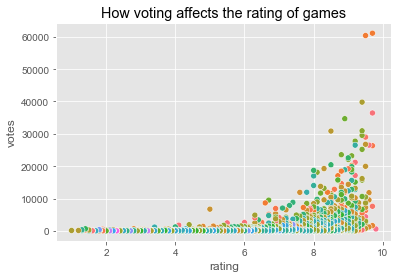

In [60]:
sns.scatterplot(data=game, x=game['rating'], y=game['votes'], hue=game['year']).set(title="How voting affects the rating of games")
# To remove the legends which is on the year
# Colour goes from Red to Pink whereby Red is more recent like 2022 and Pink is more older like 1970
# Colour scheme = (More recent) Red --> Orange --> Yellow --> Green --> Blue --> Purple --> Pink (More older/Less recent)
plt.legend([],[], frameon=False) 
sns.set(rc={'figure.figsize':(20.0, 20.0)}) # Make the graph bigger in size

Using the scatter graph from above, 3 graph containing different number of clusters will be visualised from it.

The 3 graph and the number of clusters in each graph:
- First graph have 2 clusters
- Second graph have 5 clusters
- Third graph have 7 clusters

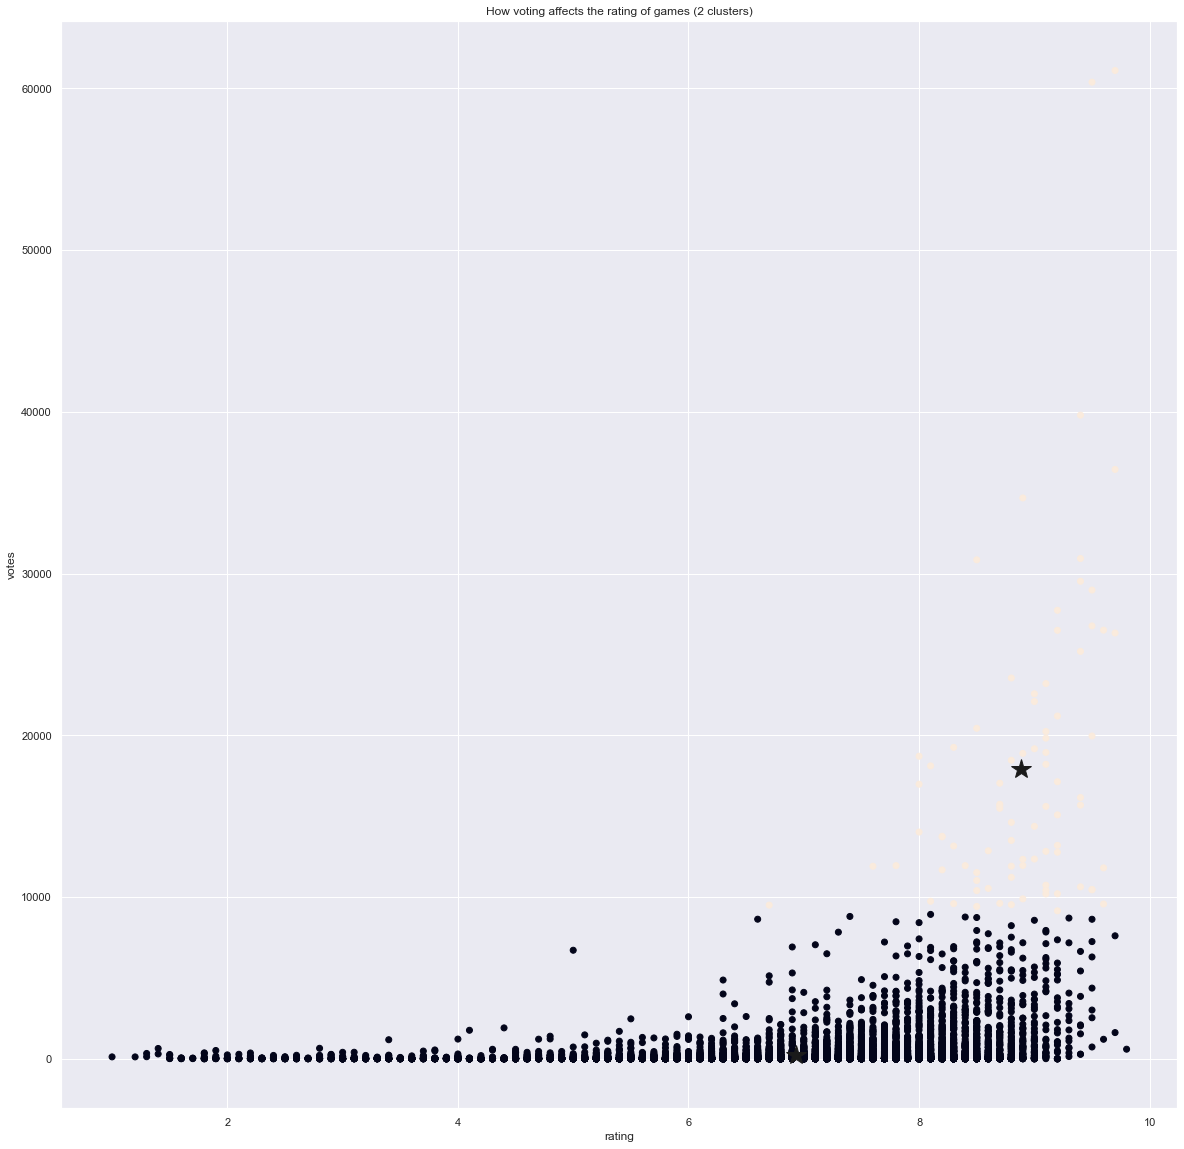

In [61]:
kmeans = KMeans(n_clusters=2).fit(
game[['rating','votes']]
)
# Look at the outputs: Two cluster centers
kmeans.cluster_centers_
# Look at the outputs: Cluster labels
kmeans.labels_

plt.scatter(
    x = game['rating'],
    y = game['votes'],
    c = kmeans.labels_)

# Cluster centers are black stars
plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)

plt.title("How voting affects the rating of games (2 clusters)")
plt.xlabel('rating')
plt.ylabel('votes')
plt.show()

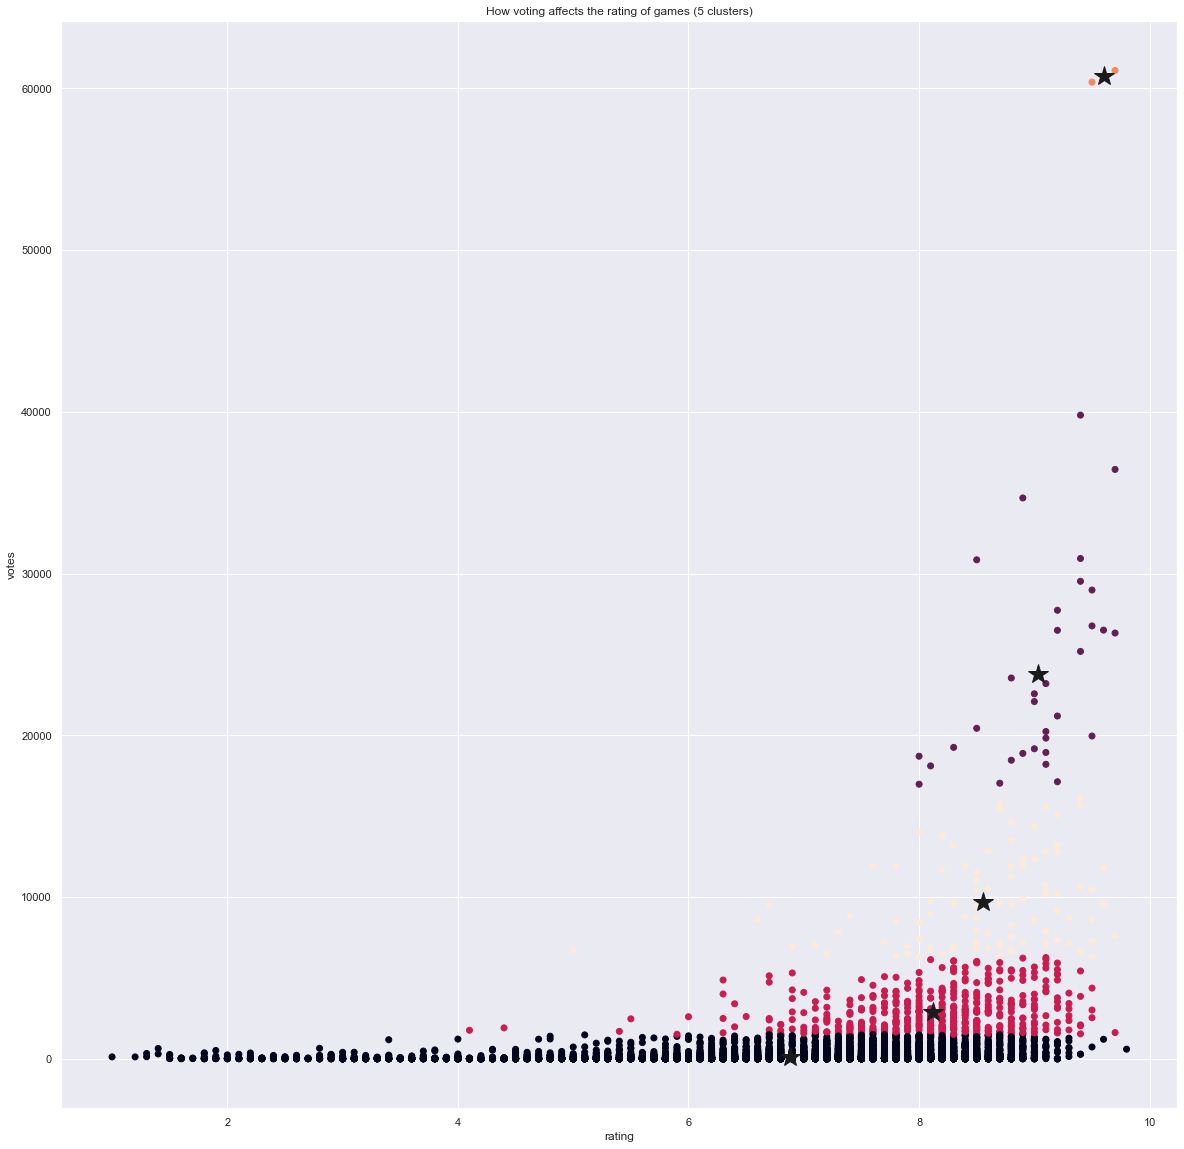

In [62]:
kmeans = KMeans(n_clusters=5).fit(
game[['rating','votes']]
)
# Look at the outputs: Two cluster centers
kmeans.cluster_centers_
# Look at the outputs: Cluster labels
kmeans.labels_

plt.scatter(
    x = game['rating'],
    y = game['votes'],
    c = kmeans.labels_)

# Cluster centers are black stars
plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)

plt.title("How voting affects the rating of games (5 clusters)")
plt.xlabel('rating')
plt.ylabel('votes')
plt.show()

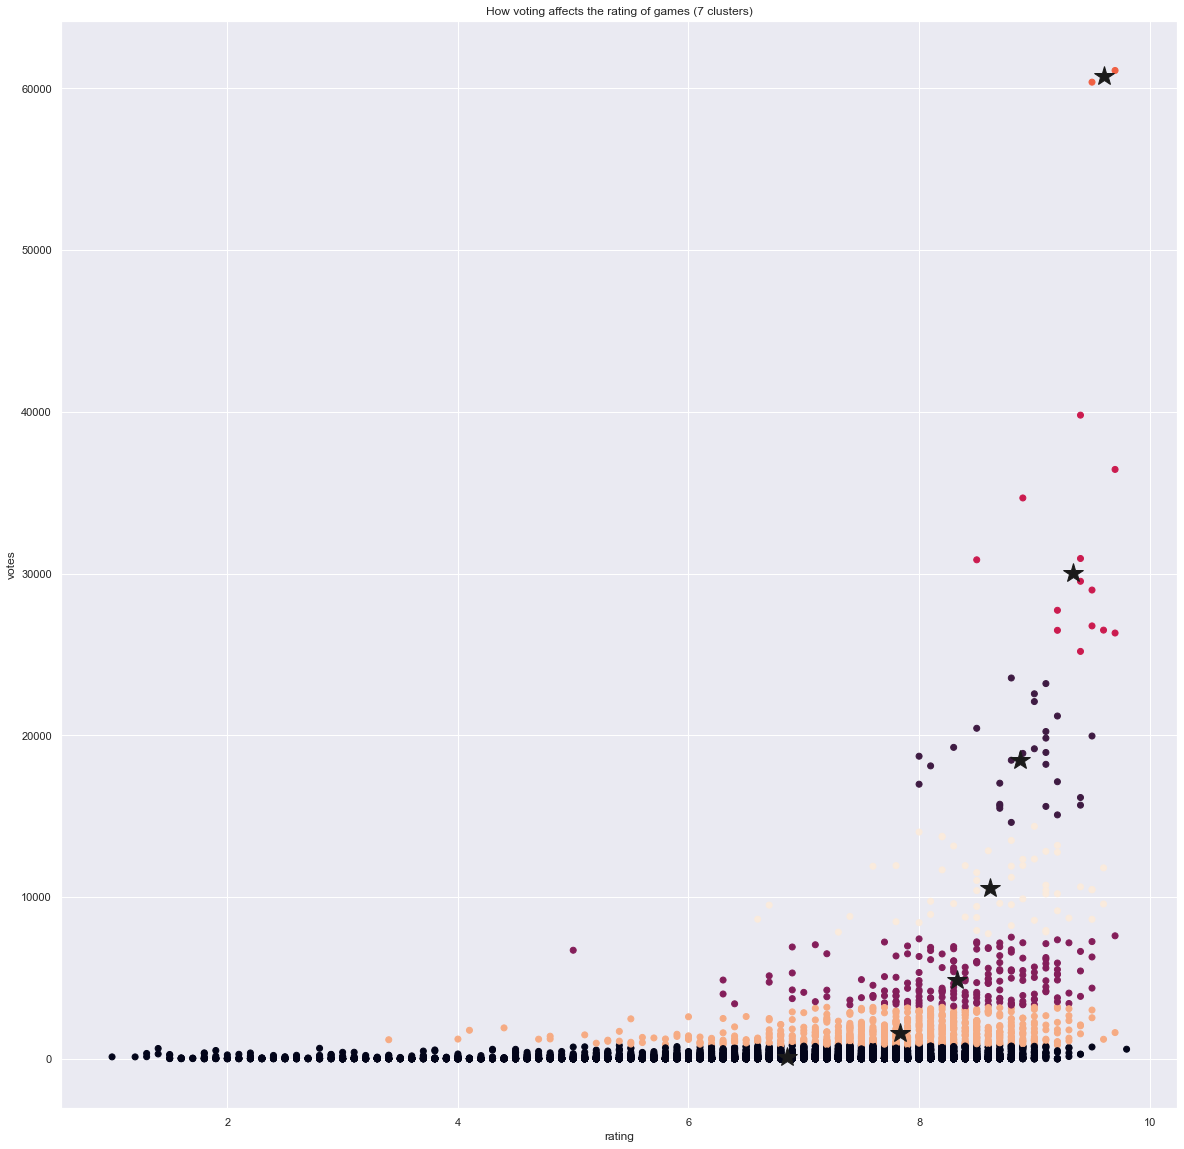

In [63]:
kmeans = KMeans(n_clusters=7).fit(
game[['rating','votes']]
)
# Look at the outputs: Two cluster centers
kmeans.cluster_centers_
# Look at the outputs: Cluster labels
kmeans.labels_

plt.scatter(
    x = game['rating'],
    y = game['votes'],
    c = kmeans.labels_)

# Cluster centers are black stars
plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)

plt.title("How voting affects the rating of games (7 clusters)")
plt.xlabel('rating')
plt.ylabel('votes')
plt.show()

There are 3 graphs of clustering that are clustered by different number of clusters:
- First graph have 2 clusters
- Second graph have 5 clusters
- Third graph have 7 clusters

Generally, clusters means that objects or data grouped together in a cluster are more similar to each other compared to objects or data in other clusters. 

Like for example, from the first graph that have 2 clusters shown in black and peach colour. This shows that data or objects within the black cluster are more similar to each other and is different from peach cluster.

The black stars are known as cluster centre which is basically the mean of all the data or objects within the given clusters. Each cluster usually have 1 cluster centre, so if there's 5 clusters, there's 5 cluster centre; if there's 7 clusters, then there will be 7 cluster centre.

The data or objects recorded are games and all games recorded are different.
#### First graph (2 clusters)

The first graph has 2 clusters and the data or objects of the black clusters are positioned below 10,000 votes while the data or objects of the peach clusters are mostly positioned above 10,000 votes, there are still some data or objects that belonged to the peach clusters below 10,000 votes but the portion of data or objects below 10,000 votes is of minority. 

The data or objects of the black cluster is mostly evenly distributed for the rating for the games which is from 0 to 10 where 0 is essentially the worst rating and 10 as the best rating a game could have. The data or objects of the peach cluster have a better rating and higher votes compared to the data or objects of the black cluster.

To conclude the clustering done for the first graph is that the games under the black cluster have a lower vote and the ratings for the games varied where there are games with high rating and games with low rating but essentially, all the games under black cluster have low votes which is below 10,000 votes. On the other hand, majority of the games under the peach clusters have good rating and higher votes although there are indeed some games under peach cluster with votes lower than 10,000 votes but those are of minority.

#### Second graph (5 clusters)
The second graph have 5 clusters indicated by 5 different colours which are black, magenta, peach, purple and orange.

Data or objects under black and magenta clusters have votes below 10,000 votes and from the naked eye, data or objects under black cluster have votes below 5,000 votes. Although the data or objects under black and magenta clusters have votes below 10,000 votes, data or objects under magenta cluster have a higher number of votes and better rating compared to black cluster. Therefore, games under black and orange cluster have various performance level from good to average but overall, games under magenta cluster have better performance than black cluster but have a slightly worst performance compared to games under peach cluster.

Peach cluster have data or objects with good rating within the range of 6 to 10 and the votes are within the range of 5,000 and 20,000 votes. Hence, one could say that games under peach cluster have average performance where they are not too bad and also not the best either.

Purple and orange clusters generally can give the players a better gaming experience but the games under purple cluster still lacked compared to games under orange cluster. Orange cluster have games that have great rating within the range of 8 to 10 and have the highest votes compared to all the other games with above 60,000 votes. Games under purple cluster also have great rating within the range of 8 to 10 but their votes obtained are only within range of 15,000 to 40,000 votes which still have quite a huge gap compared to games under magenta cluster.

#### Third graph (7 clusters)
The second graph have 7 clusters indicated by 7 different colours which are black, peach, voilet, light-peach, purple, pinkish-magenta and darker-peach.

Game under black, voilet and peach clusters have the lowest votes compared to games under other clusters as these games under black, voilet and peach clusters have only votes below 10,000. Although within these 3 clusters, there are games rating as high as above 9 but compared to games under pinkish-magenta and darker-peach clusters, players would prefer to play games under pinkish-magenta and darker-peach clusters. Nevertheless, between these 3 clusters (black, voilet and peach clusters), although games under black cluster have evenly distributed ratings but games under peach cluster will be more preferable compared to black cluster and of course, games under voilet cluster will be more favoured compared to orange cluster.

Games under light-peach, purple and pinkish-magenta clusters are labelled as average to ordinary games where they have an averagely higher rating and votes compared to games under black, purple and peach clusters. Black, purple and peach clusters' games have average votes of 0 to maybe 85,000 whereas games under light-peach, purple and pinkish-magenta clusters have average votes of 85,000 to 40,000 which obviously shows that games under light-peach, purple and pinkish-magenta clusters have a higher popularity compared to games under black, purple and peach clusters. Under these 3 clusters (violet, purple and pinkish-magenta clusters), one will obviously understand that games under pinkish-magenta clusters have a higher popularity compared to light-peach and purple cluster as these games have rating ranged from 8 to 10 and votes from 25,000 to 40,000. Although games under purple cluster also have rating ranged from 8 to 10 but their votes are of a lower range from 15,000 to 25,000. Games under light-peach cluster have the lowest votes accumulated compared to games under purple and pinkish-magenta clusters and ratings within range 6 to 10.

Games under darker-peach cluster have the highest popularity compared to the other games within the dataset as these games have votes above 60,000 and ratings above 9.0 to 10.0 which shows the high number of players playing these games under darker-peach cluster.

## End of Assignment